# Подключение к Kaggle для загрузки данных прямо из браузера


Загрузим файл kaggle.json , содержащий учетные данные для API, в среду выполнения Colab.

In [109]:
from google.colab import files

In [110]:
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Загружаем Данные

Загрузим необходимые для прохождения соревнования данные

In [111]:
!kaggle competitions download -c urfuengaiml2022clustering

urfuengaiml2022clustering.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
!unzip urfuengaiml2022clustering.zip

Archive:  urfuengaiml2022clustering.zip
replace Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Загружаем данные в Pandas

In [113]:
#импорт библиотек
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set() 

In [114]:
#Загрузка данных для кластеризации
X = pd.read_csv('/content/Data.csv', delimiter = ',', index_col = 'idx')
X

,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5
idx,,,,,
0,-0.179369,-0.013356,0.016641,-0.325923,-0.031094
1,-0.157893,-0.010647,0.002895,-0.332016,-0.012547
2,-0.249451,-0.011700,-0.001435,-0.487909,-0.005343
3,-0.158938,0.210980,0.021905,-0.334196,-0.013976
4,-0.687836,0.422630,0.054028,0.719132,-0.038392
...,...,...,...,...,...
19915,-0.600084,-0.011454,-0.024991,0.700872,0.018778
19916,-0.081612,-0.001023,-0.045937,-0.353670,0.053334
19917,-0.028544,0.002083,-0.048065,-0.493040,0.062817


In [115]:
X.info()#на всякий случай проверим всё ли в порядке

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19920
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Признак 1  19033 non-null  float64
 1   Признак 2  19033 non-null  float64
 2   Признак 3  19033 non-null  float64
 3   Признак 4  19033 non-null  float64
 4   Признак 5  19033 non-null  float64
dtypes: float64(5)
memory usage: 892.2 KB


In [116]:
#загрузка файла плейсхолдера для итогового решения
Submission = pd.read_csv('/content/Submission.csv', delimiter = ',', index_col = 'idx')
Submission

,label
idx,
0,2
1,0
2,0
3,0
4,1
...,...
19915,0
19916,0
19917,0


#Разведовательный анализ данных

In [117]:
X.describe()

,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5
count,1.903300e+04,1.903300e+04,1.903300e+04,1.903300e+04,1.903300e+04
mean,1.567950e-17,5.039840e-17,-8.922383e-17,1.657547e-16,3.434557e-17
std,5.372720e-01,6.612815e-02,6.395875e-02,4.809839e-01,5.676626e-02
min,-8.865561e-01,-4.705258e-02,-3.499009e-01,-5.417184e-01,-3.695438e-01
25%,-2.556412e-01,-1.392043e-02,-2.251187e-02,-4.636834e-01,-1.943088e-02
50%,-1.527072e-01,-9.348055e-03,3.760155e-03,-1.193854e-01,2.740698e-03
75%,1.387202e-01,-5.841646e-03,2.707801e-02,3.591970e-01,2.958351e-02
max,1.048308e+00,9.805234e-01,3.976242e-01,1.067578e+00,4.547306e-01


Изобразим пару-тройку десятков графиков, чтобы ситуация стала по-понятнее:

<Figure size 1080x1080 with 0 Axes>

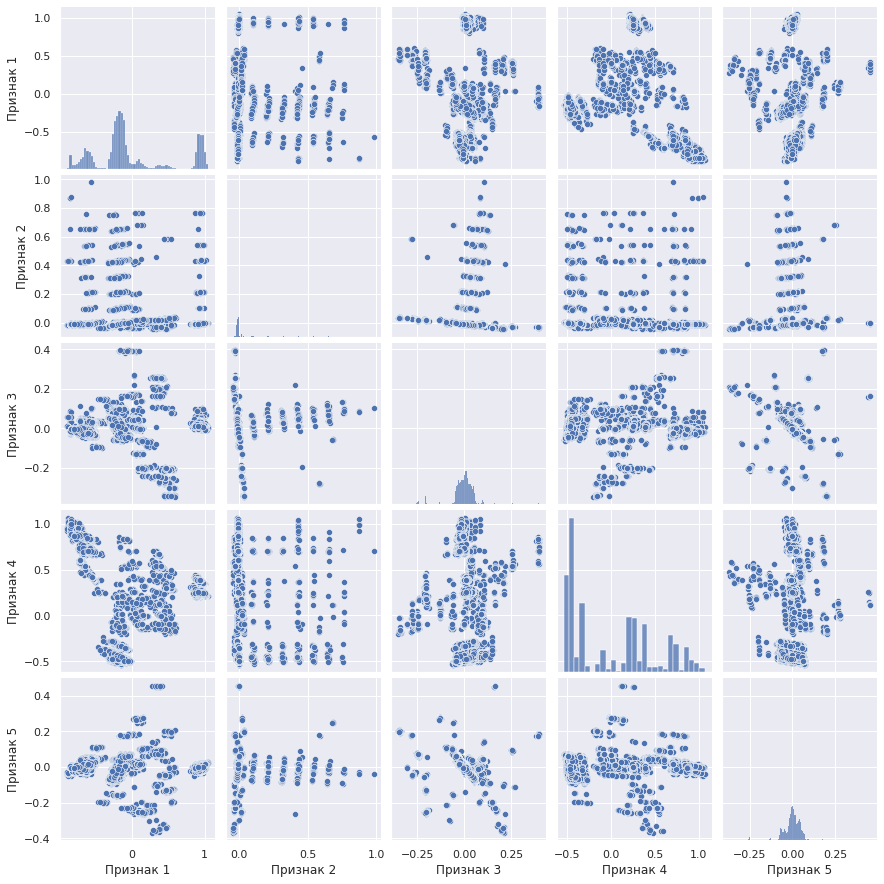

In [118]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = X)


Ещё больше графиков, на этот раз joinplot:

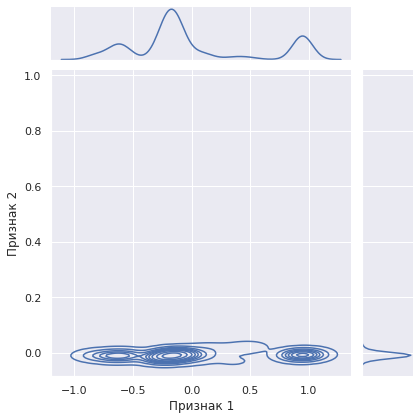

In [119]:
sns.jointplot(x=X['Признак 1'], y=X['Признак 2'], kind="kde")

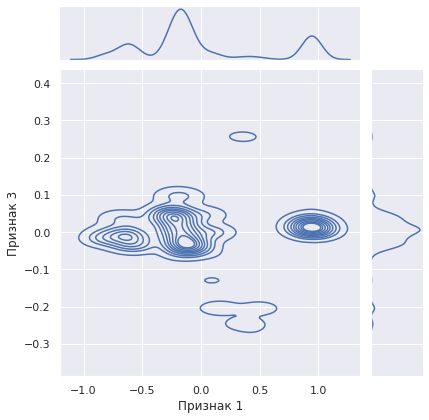

In [120]:
sns.jointplot(x=X['Признак 1'], y=X['Признак 3'], kind="kde")

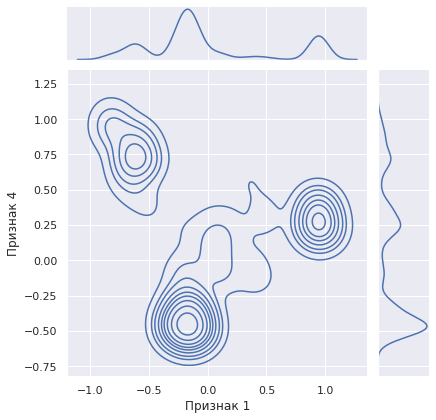

In [121]:
sns.jointplot(x=X['Признак 1'], y=X['Признак 4'], kind="kde")

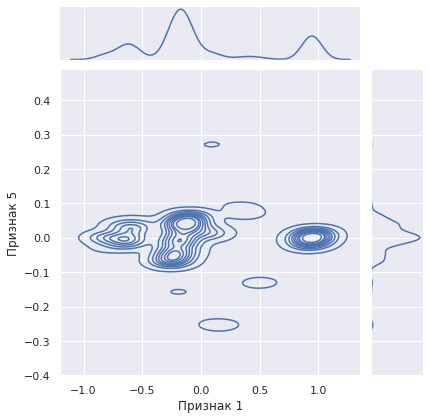

In [122]:
sns.jointplot(x=X['Признак 1'], y=X['Признак 5'], kind="kde")

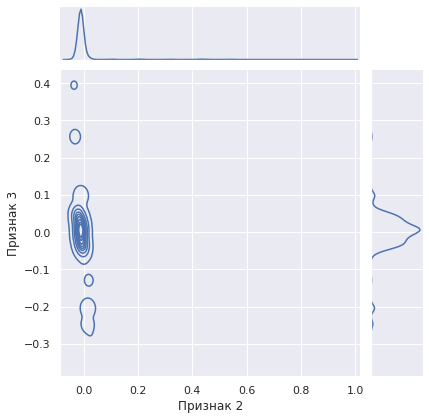

In [123]:
sns.jointplot(x=X['Признак 2'], y=X['Признак 3'], kind="kde")

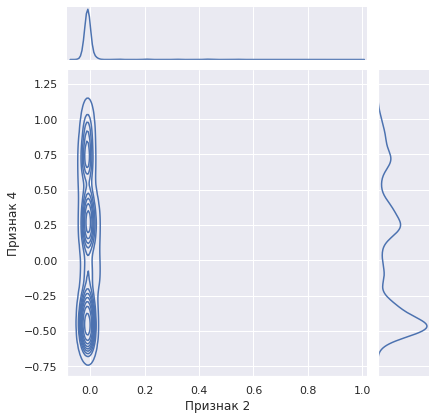

In [124]:
sns.jointplot(x=X['Признак 2'], y=X['Признак 4'], kind="kde")

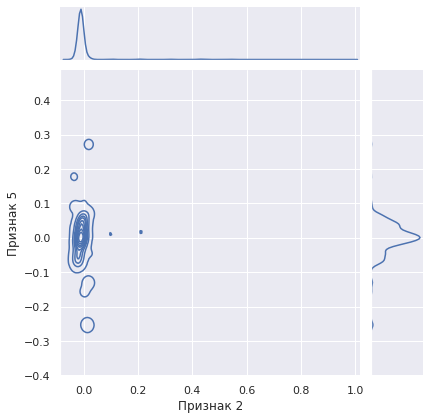

In [125]:
sns.jointplot(x=X['Признак 2'], y=X['Признак 5'], kind="kde")

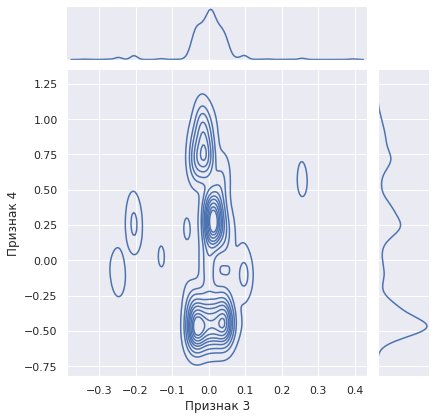

In [126]:
sns.jointplot(x=X['Признак 3'], y=X['Признак 4'], kind="kde")

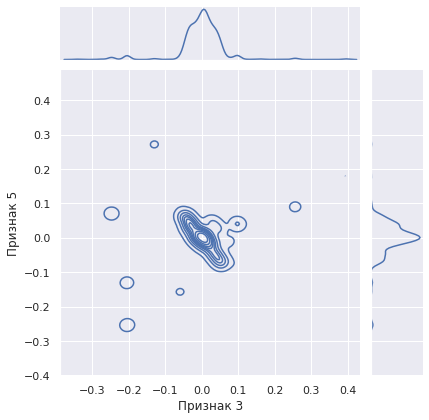

In [127]:
sns.jointplot(x=X['Признак 3'], y=X['Признак 5'], kind="kde")

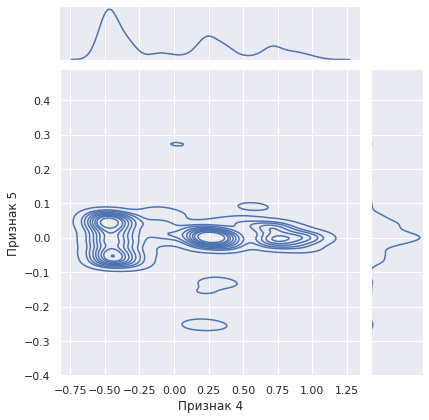

In [128]:
sns.jointplot(x=X['Признак 4'], y=X['Признак 5'], kind="kde")

После просмотра всех выше приведенных графиков, мне больше всего понравились следующие сочетания признаков:
1-3
1-5
3-4
4-5
Т.к внешне кажется, что выбросов среди них нетак много, а также , что они обладают возможным потенциалом на разбиение на 3-4 кластера.

#Метод к-средних

Подбор признаков и количества кластеров:

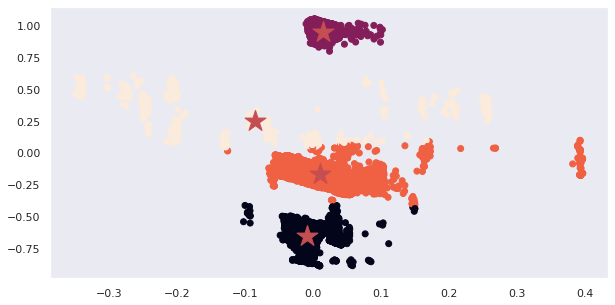

In [129]:

pca_x = 3 #@param {type:"slider", min:1, max:5, step:1}
pca_y = 1 #@param {type:"slider", min:1, max:5, step:1}
#@markdown ### Число Кластеров
k = 4 #@param {type:"slider", min:2, max:10, step:1}

X_cluster = X.loc[:,['Признак '+str(pca_x), 'Признак '+str(pca_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

После продолжительного перетаскивания ползунков, я остановил свой выбор на сочетании признаков 1-3, а также на количестве кластеров равном 4. 

Посмотрим на метрики Инерции и Коэффициента Силуэта, чтобы проверить мои догадки.

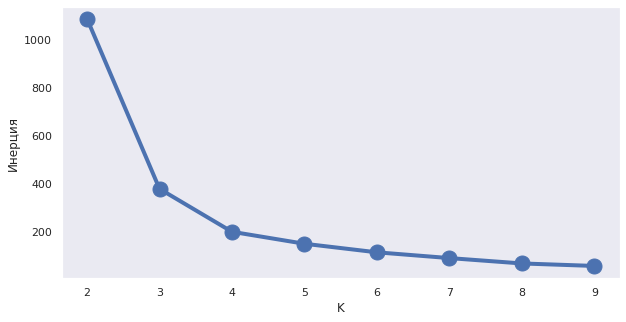

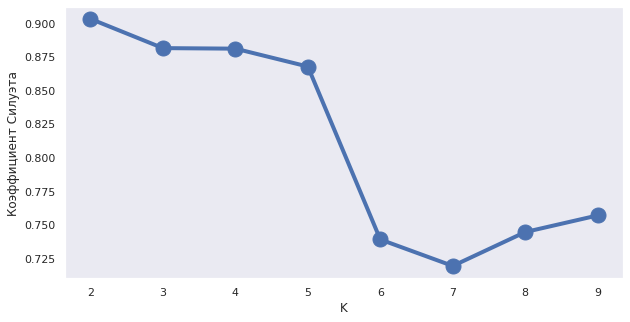

In [130]:
sse = []
sil_scor = []
list_k = list(range(2, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_cluster)
    sse.append(km.inertia_)
    labels = km.fit_predict(X_cluster)
    sil_scor.append(metrics.silhouette_score(X_cluster, labels, metric='sqeuclidean'))

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Инерция');
plt.figure(figsize=(10, 5))
plt.plot(list_k, sil_scor, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Коэффициент Силуэта');

Инерция:  по принципу локтя мы видим , что изгиб локтя приходится ровно на четверку, следовательно с количеством кластеров я угадал.
Коэффициент Силуэта: при количестве кластеров = 4, коэффициент равняется примерно 0.88, звучит неплохо.

# Делаем предсказание

In [131]:
X_cluster = X.loc[:,['Признак 1', 'Признак 3']].values

km = KMeans(n_clusters=4, random_state = 0)
km.fit(X_cluster)
predict=km.predict(X_cluster)

In [132]:
Submission.label = predict

In [133]:
Submission

,label
idx,
0,0
1,0
2,0
3,0
4,2
...,...
19915,2
19916,0
19917,0


In [134]:
Submission.label.value_counts()

0    10133
1     3865
2     3559
3     1476
Name: label, dtype: int64

In [135]:
Submission.to_csv('/content/My_Submission.csv',index=True)

In [136]:
!kaggle competitions submit -c urfuengaiml2022clustering -f My_Submission.csv -m "Second try"

100% 138k/138k [00:00<00:00, 684kB/s]
Successfully submitted to UrFU_EngAI_ML_2022_Clustering